## **Description**

We have the historical stock data of Axis bank, State Bank of India and Kotak Mahindra Bank. In this notebook I have performed an analysis of the given data for 3 financial years i.e. 2020, 2021 and 2022. <br>

**Note : The financial year stars from the month of April in India and all the stock prices are in INR (Indian Rupee)**

- Region - India
- Domain - Finance

- Research Question 1 - How the stocks prices of different banks have changed from financial year 2020 to 2022?
- Research Question 2 - How the stock prices depend on the volume of stocks sold?
- Research Question 3 - Is there any correlation between the stock prices of different banks?

## **Datasets Links**
- [State Bank of India](https://finance.yahoo.com/quote/SBIN.NS/history?period1=1585699200&period2=1680307200&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true)
- [Kotak Mahindra Bank](https://finance.yahoo.com/quote/KOTAKBANK.NS/history/)
- [Axis Bank](https://finance.yahoo.com/quote/AXISBANK.NS/history?p=AXISBANK.NS)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 400  # Enhancing the quality of the image
plt.rcParams['font.size'] = 5
plt.rc('figure', figsize=(4, 3))

### Reading the data

In [2]:
axis_bank = pd.read_csv('./axis_bank_stocks.csv')
sbi = pd.read_csv('./SBI_stocks.csv')
kotak = pd.read_csv('./kotak_stocks.csv')

### Data Interpetation and Cleaning

In [3]:
axis_bank.head()
axis_bank.shape

(746, 7)

In [4]:
sbi.head()
sbi.shape

(746, 7)

In [5]:
kotak.head()
kotak.shape

(746, 7)

In [7]:
axis_bank.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
sbi.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
kotak.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Cool, there are no null values in the datasets

In [10]:
# Colors
axis_bank['Date'] = pd.to_datetime(axis_bank['Date'])
sbi['Date'] = pd.to_datetime(sbi['Date'])
kotak['Date'] = pd.to_datetime(kotak['Date'])

#### Let's answer the first question

In [11]:
blue = '#1F75FE'
orange = '#ff8c42'
green = '#33b864'

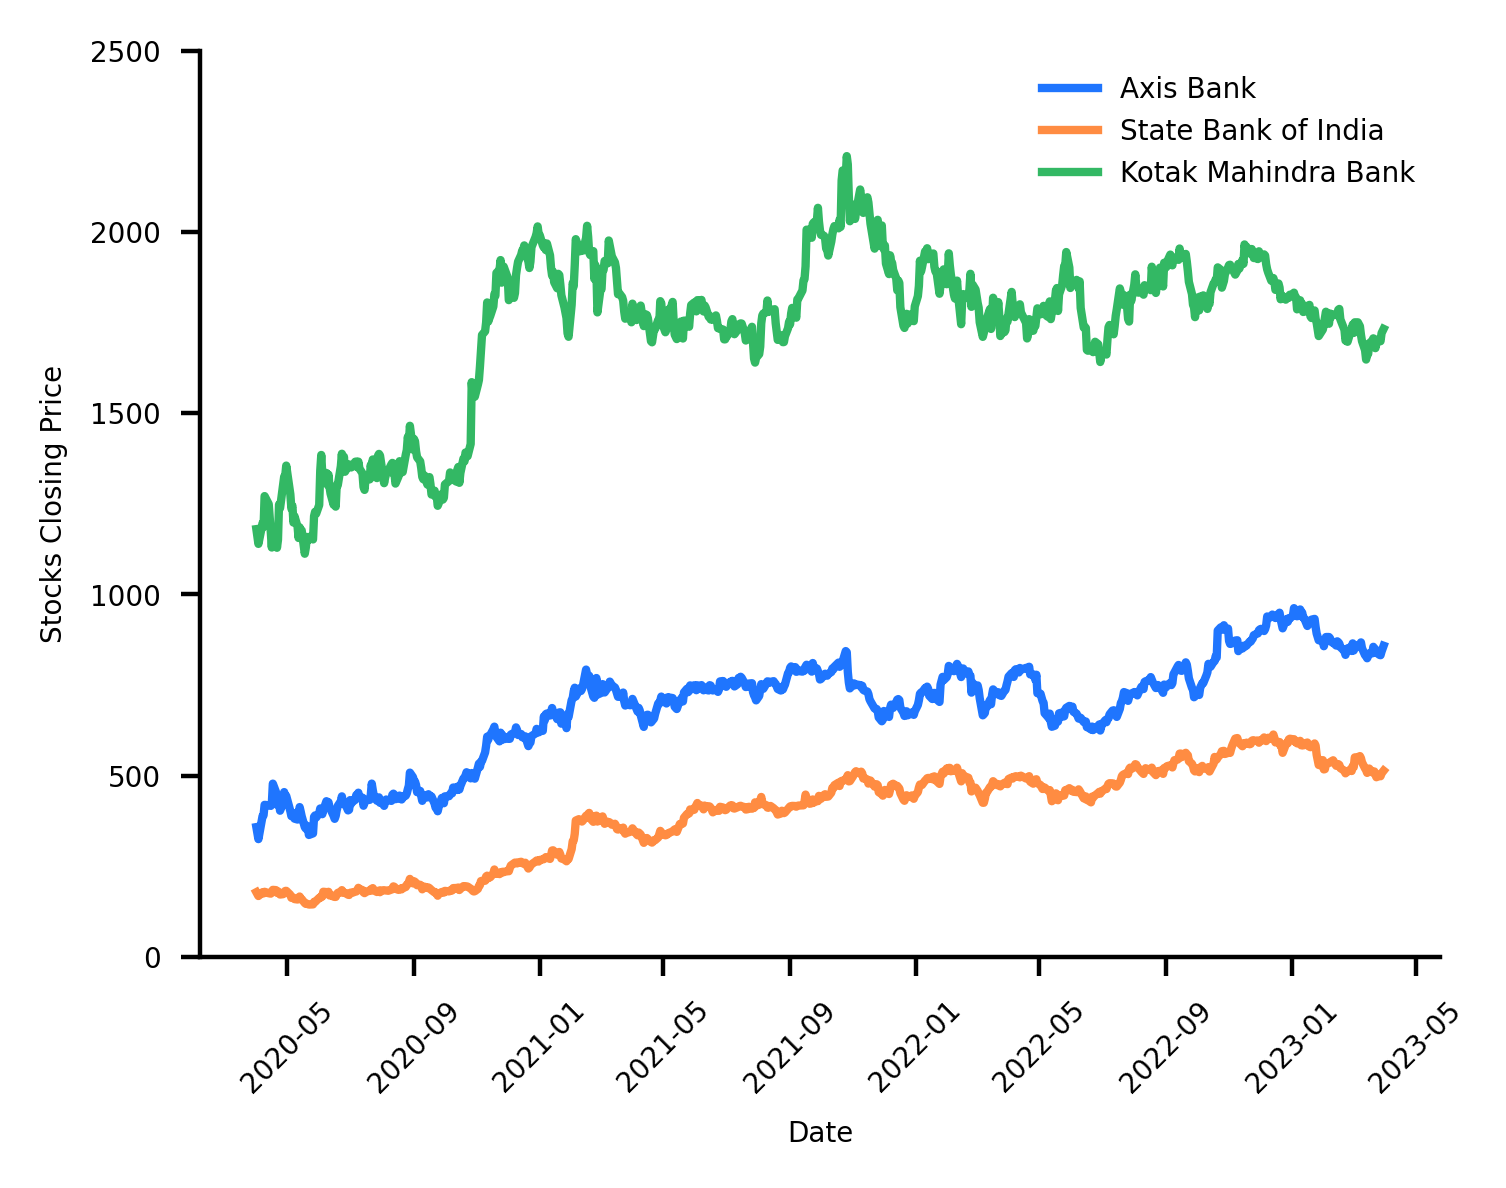

In [13]:
plt.plot(axis_bank['Date'], axis_bank['Adj Close'], c=blue, label='Axis Bank')
plt.plot(sbi['Date'], sbi['Adj Close'], c=orange, label='State Bank of India')
plt.plot(kotak['Date'], kotak['Adj Close'], c=green, label='Kotak Mahindra Bank')
plt.legend(frameon=False, loc='upper right')
plt.xlabel('Date')
plt.ylabel('Stocks Closing Price')
plt.ylim(0, 2500)
ax = plt.gca()

plt.xticks(rotation=45)

# Turn off the upper and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

#### Second Question - Correlation of stock prices with stocks volume

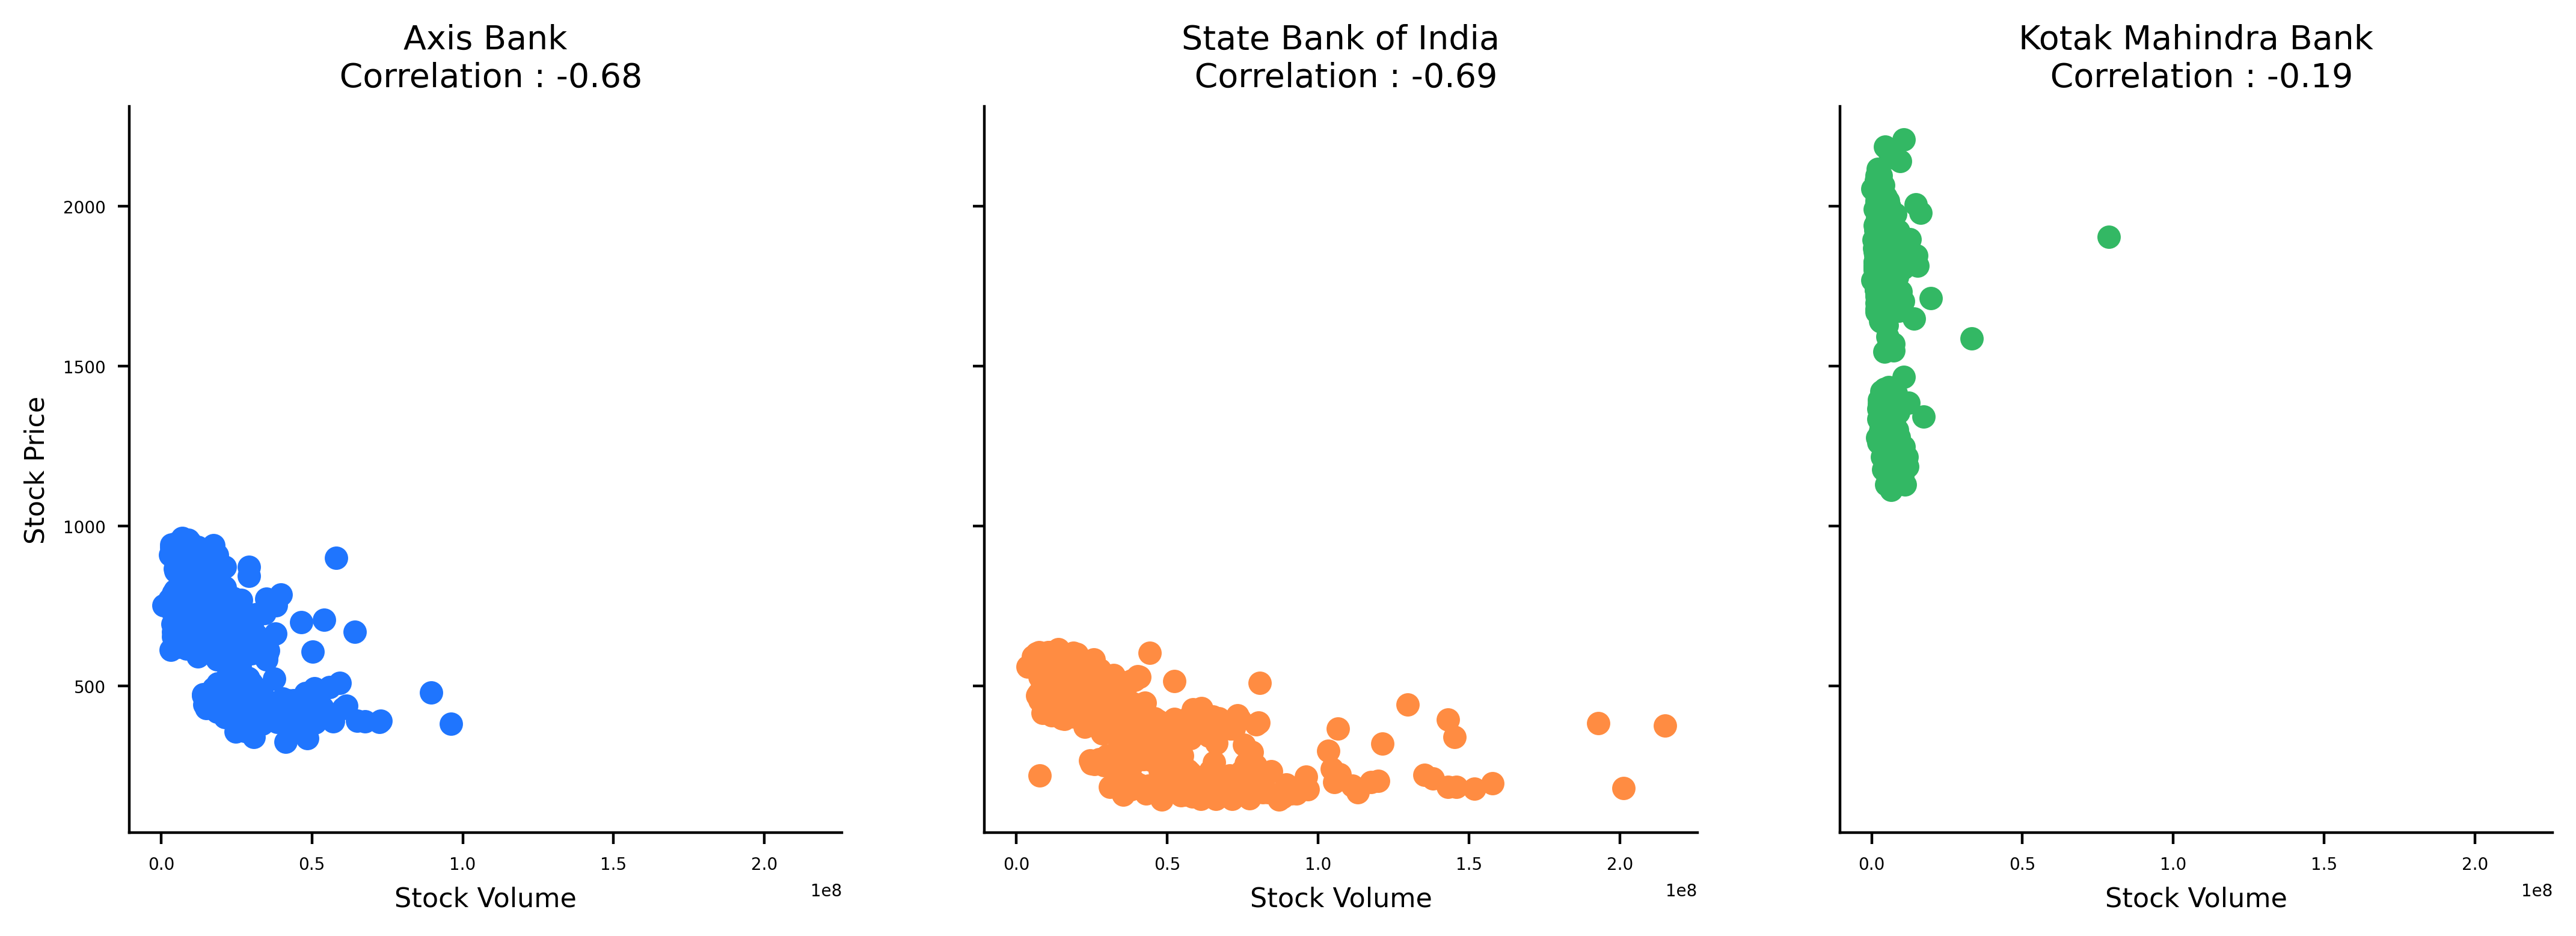

In [15]:
from scipy import stats

fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(13,4), sharey=True, sharex=True)

corr1, pval = stats.pearsonr(axis_bank['Volume'], axis_bank['Adj Close'])

ax1.scatter(axis_bank['Volume'], axis_bank['Adj Close'], color=blue)
ax1.set_xlabel('Stock Volume', fontsize=8)
ax1.set_ylabel('Stock Price', fontsize=8)
ax1.set_title(f'Axis Bank\n Correlation : {round(corr1,2)}', fontsize=10)


corr2, pval = stats.pearsonr(sbi['Volume'], sbi['Adj Close'])

ax2.scatter(sbi['Volume'], sbi['Adj Close'], color=orange)
ax2.set_xlabel('Stock Volume', fontsize=8)
ax2.set_title(f'State Bank of India\n Correlation : {round(corr2,2)}', fontsize=10)


corr3, pval = stats.pearsonr(kotak['Volume'], kotak['Adj Close'])

ax3.scatter(kotak['Volume'], kotak['Adj Close'], color=green)
ax3.set_xlabel('Stock Volume', fontsize=8)
ax3.set_title(f'Kotak Mahindra Bank\n Correlation : {round(corr3,2)}', fontsize=10)

for ax in [ax1, ax2, ax3] :
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.show();


It is visible from the plots above that for SBI and Axis Bank, the correlation between the stock volume and stock price is highly negative while for Kotak Mahindra Bank, it is nearly 0

#### Third Question - Relationship between the stock prices of different banks

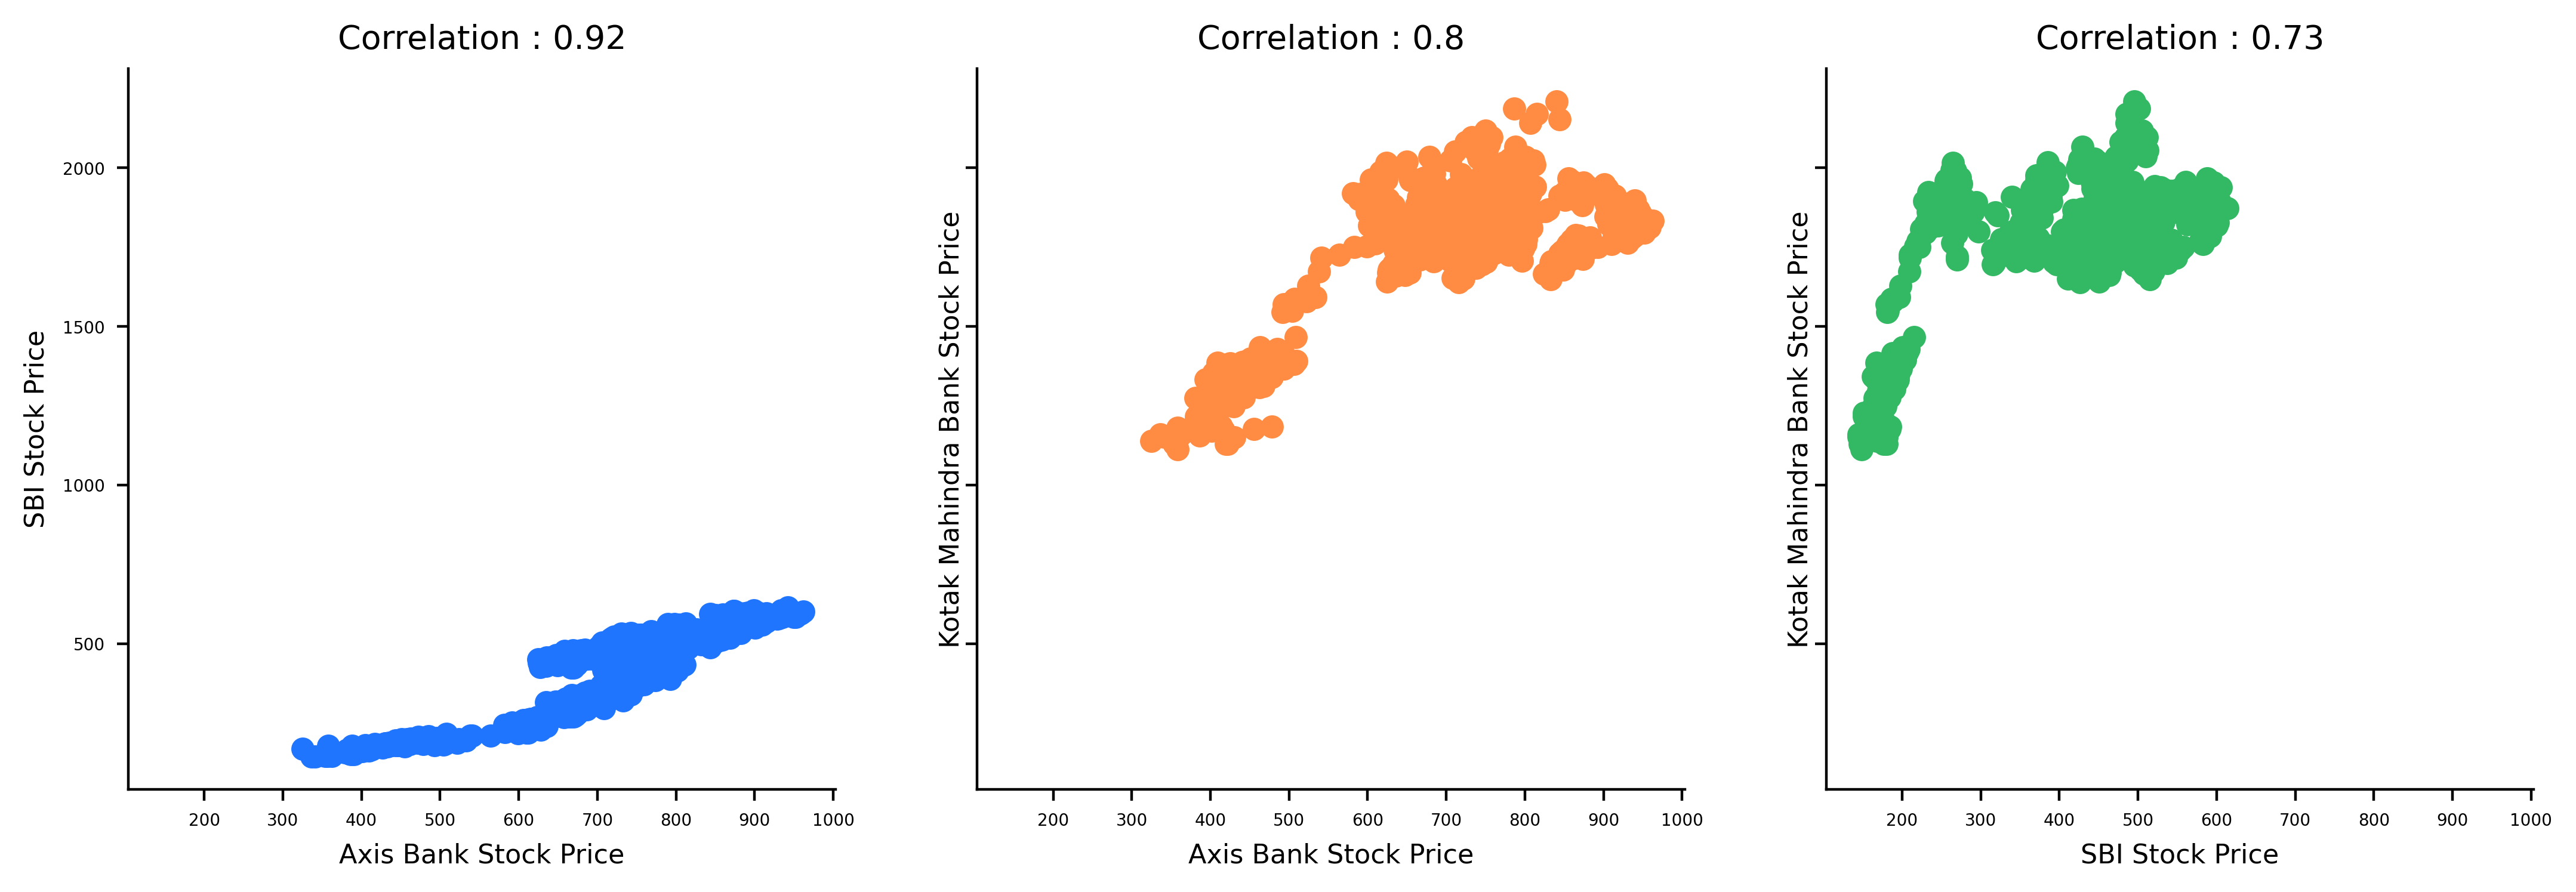

In [16]:
fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(13,4), sharey=True, sharex=True)

corr1, pval = stats.pearsonr(axis_bank['Adj Close'], sbi['Adj Close'])

ax1.scatter(axis_bank['Adj Close'], sbi['Adj Close'], color=blue)
ax1.set_xlabel('Axis Bank Stock Price', fontsize=8)
ax1.set_ylabel('SBI Stock Price', fontsize=8)
ax1.set_title(f'Correlation : {round(corr1,2)}', fontsize=10)


corr2, pval = stats.pearsonr(axis_bank['Adj Close'], kotak['Adj Close'])

ax2.scatter(axis_bank['Adj Close'], kotak['Adj Close'], color=orange)
ax2.set_xlabel('Axis Bank Stock Price', fontsize=8)
ax2.set_ylabel('Kotak Mahindra Bank Stock Price', fontsize=8)
ax2.set_title(f'Correlation : {round(corr2,2)}', fontsize=10)


corr3, pval = stats.pearsonr(sbi['Adj Close'], kotak['Adj Close'])

ax3.scatter(sbi['Adj Close'], kotak['Adj Close'], color=green)
ax3.set_xlabel('SBI Stock Price', fontsize=8)
ax3.set_ylabel('Kotak Mahindra Bank Stock Price', fontsize=8)
ax3.set_title(f'Correlation : {round(corr3,2)}', fontsize=10)

for ax in [ax1, ax2, ax3] :
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.show();

##### We can also visualise the relationship between different stock prices using pairplot

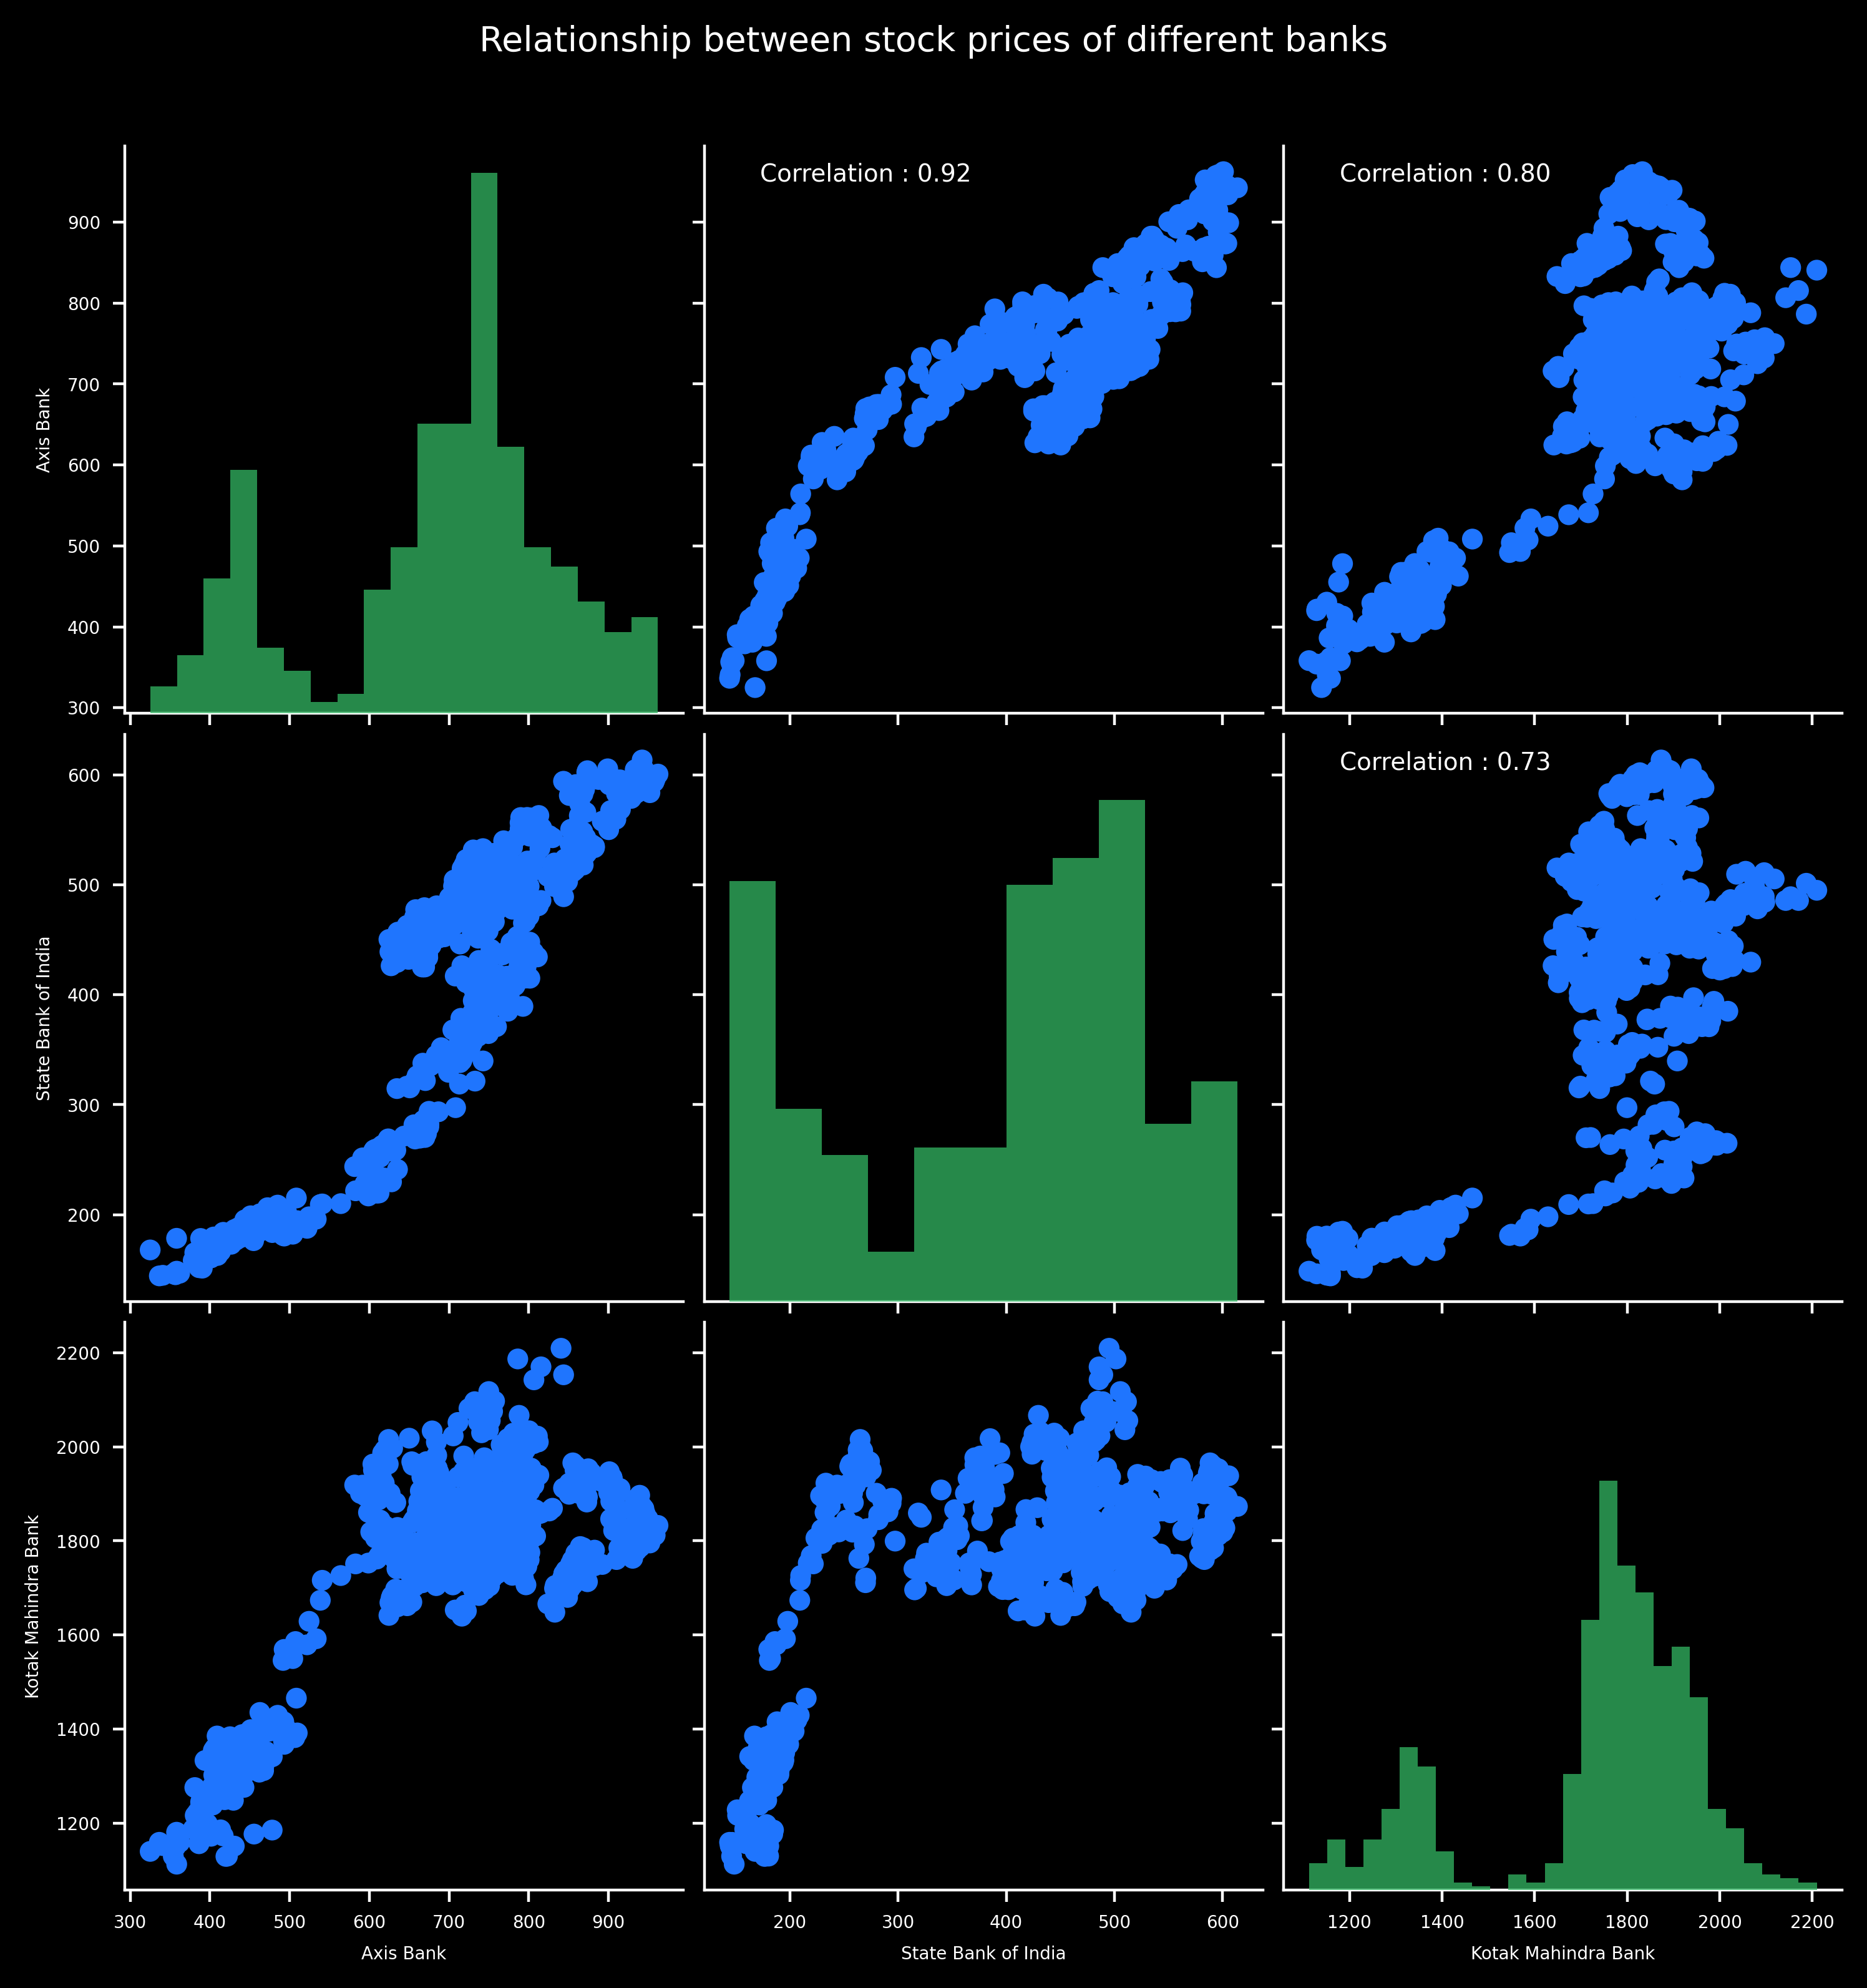

In [126]:
import seaborn as sns 

df = pd.DataFrame()
df['Axis Bank'] = axis_bank['Adj Close']
df['State Bank of India'] = sbi['Adj Close']
df['Kotak Mahindra Bank'] = kotak['Adj Close']
df
pair_plot = sns.pairplot(df, plot_kws={'color' : blue, 'edgecolor': 'None'}, diag_kws={'color': green, 'edgecolor': 'None'});

pair_plot.fig.suptitle("Relationship between stock prices of different banks", y=1.05, fontsize=10)

correlation_matrix = df.corr()
correlation_matrix

# Add the correlation values as text to the pair plot
for i, j in zip(*plt.np.triu_indices_from(pair_plot.axes, 1)):
    pair_plot.axes[i, j].annotate(f"Correlation : {correlation_matrix.iloc[i, j]:.2f}", (0.1, 0.95), xycoords="axes fraction", ha="left", va="center", fontsize=7)